In [1]:
print('helo world')

helo world


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
data = pd.read_csv("/content/tested.csv")  # Replace with the correct file path
print(data.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


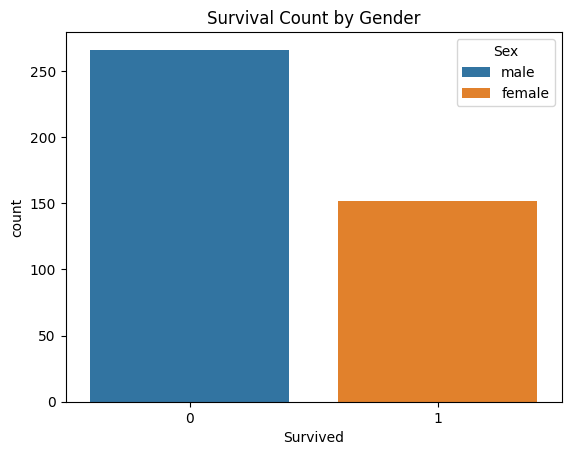

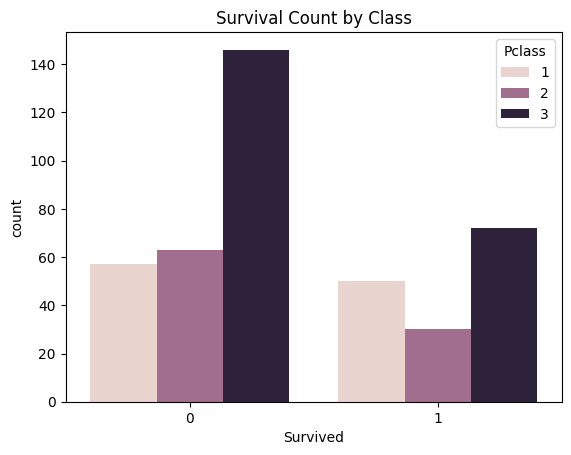

In [4]:
# Check for missing values
print(data.isnull().sum())

# Visualize survival based on different factors
sns.countplot(data=data, x="Survived", hue="Sex")
plt.title("Survival Count by Gender")
plt.show()

sns.countplot(data=data, x="Survived", hue="Pclass")
plt.title("Survival Count by Class")
plt.show()


In [9]:
# Check if columns exist before dropping
columns_to_drop = ['Name', 'Ticket', 'Cabin']
for column in columns_to_drop:
    if column in data.columns:
        data.drop(column, axis=1, inplace=True)

# Fill missing values in the 'Age' column with the median age
data['Age'] = data['Age'].fillna(data['Age'].median())

# Drop rows with missing values in 'Embarked' if necessary
if 'Embarked' in data.columns:
    data.dropna(subset=['Embarked'], inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
if 'Sex' in data.columns:
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
if 'Embarked' in data.columns:
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

print(data.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892         0       3    1  34.5      0      0   7.8292         1
1          893         1       3    0  47.0      1      0   7.0000         2
2          894         0       2    1  62.0      0      0   9.6875         1
3          895         0       3    1  27.0      0      0   8.6625         2
4          896         1       3    0  22.0      1      1  12.2875         2


In [10]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


Sex            0.830980
Fare           0.045267
PassengerId    0.037337
Age            0.037060
Parch          0.019771
Pclass         0.011799
SibSp          0.009966
Embarked       0.007820
dtype: float64


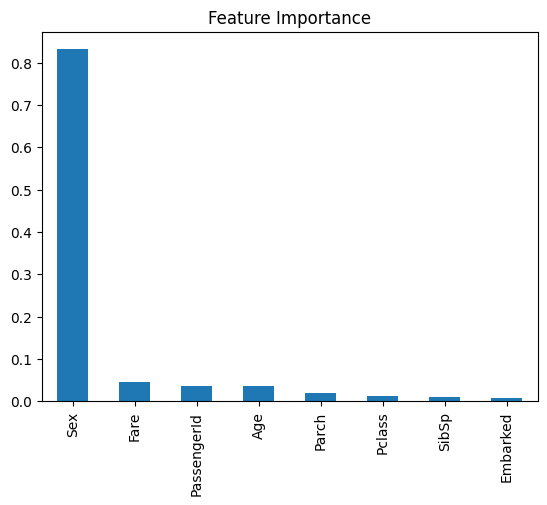

In [13]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importance)

# Plot feature importance
feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()
